# Reto House Prices

Equipo 3
---
*   Daniel Jiménez Zúñiga		      A01748460
*   Daniel Kaled Bernal Ayala		  A01750047
*   Marisol S. Ramírez Herrera		A01747396
*   Maximiliano De La Cruz Lima	  A01798048
*   Omar Alejandro López Velasco	A00838219
*   Yael Octavio Pérez Méndez		  A01799842

## Importar dataset

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!touch ~/.kaggle/kaggle.json

with open("/root/.kaggle/kaggle.json", "wt") as f:
    f.write('{"username":"maximilianodelacruz","key":"146218b3b7458495e0166e93ea89a21a"}')


!chmod 600 ~/.kaggle/kaggle.json
!cat ~/.kaggle/kaggle.json

{"username":"maximilianodelacruz","key":"146218b3b7458495e0166e93ea89a21a"}

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques
!unzip house-prices-advanced-regression-techniques.zip -d "/content/kaggledb"

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 284MB/s]
Archive:  house-prices-advanced-regression-techniques.zip
  inflating: /content/kaggledb/data_description.txt  
  inflating: /content/kaggledb/sample_submission.csv  
  inflating: /content/kaggledb/test.csv  
  inflating: /content/kaggledb/train.csv  


## Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
housing = pd.read_csv("/content/kaggledb/train.csv")

### Archivo Data Description de la competencia para entender los datos

Se añade el archivo descriptivo de los datos de la competencia para consultar conforme sea necesario

MSSubClass: Identifies the type of dwelling involved in the sale.

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park
       RM	Residential Medium Density

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel
       Pave	Paved

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

LotShape: General shape of property

       Reg	Regular
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

Utilities: Type of utilities available

       AllPub	All public Utilities (E,G,W,& S)
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

LandSlope: Slope of property

       Gtl	Gentle slope
       Mod	Moderate Slope
       Sev	Severe Slope

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

Condition1: Proximity to various conditions

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street
       Norm	Normal
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

Condition2: Proximity to various conditions (if more than one is present)

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street
       Norm	Normal
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

BldgType: Type of dwelling

       1Fam	Single-family Detached
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

HouseStyle: Style of dwelling

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

ExterCond: Evaluates the present condition of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Foundation: Type of foundation

       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete
       Slab	Slab
       Stone	Stone
       Wood	Wood

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

CentralAir: Central air conditioning

       N	No
       Y	Yes

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

GarageType: Garage location

       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished
       Unf	Unfinished
       NA	No Garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

PavedDrive: Paved driveway

       Y	Paved
       P	Partial Pavement
       N	Dirt/Gravel

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

Fence: Fence quality

       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

MiscFeature: Miscellaneous feature not covered in other categories

       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale

       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)



---



### Información, distribución y estadísticas del dataset

In [ ]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
housing.shape

(1460, 81)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
missing_mean = (housing.isna().mean() * 100).sort_values(ascending=False)
missing_mean.loc[missing_mean != 0]

,0
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
MasVnrType,59.726027
FireplaceQu,47.260274
LotFrontage,17.739726
GarageQual,5.547945
GarageFinish,5.547945
GarageType,5.547945


In [ ]:
missing_sum = housing.isnull().sum().sort_values(ascending=False)
missing_sum.loc[missing_sum != 0]

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


In [ ]:
print(housing['SalePrice'].value_counts())
print(f"max = {min(housing['SalePrice'])}, min = {max(housing['SalePrice'])}")

SalePrice
140000    20
135000    17
145000    14
155000    14
190000    13
          ..
223000     1
257000     1
282922     1
193879     1
137450     1
Name: count, Length: 663, dtype: int64
max = 34900, min = 755000


In [ ]:
print(housing['Alley'].value_counts(), '\n')
print(housing['PoolQC'].value_counts(), '\n')
print(housing['ExterQual'].value_counts(), '\n')
print(housing['OverallQual'].value_counts(), '\n')
print(housing['YearBuilt'].value_counts())

Alley
Grvl    50
Pave    41
Name: count, dtype: int64 

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64 

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64 

OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64 

YearBuilt
2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: count, Length: 112, dtype: int64


### Análisis SalePrice (target)

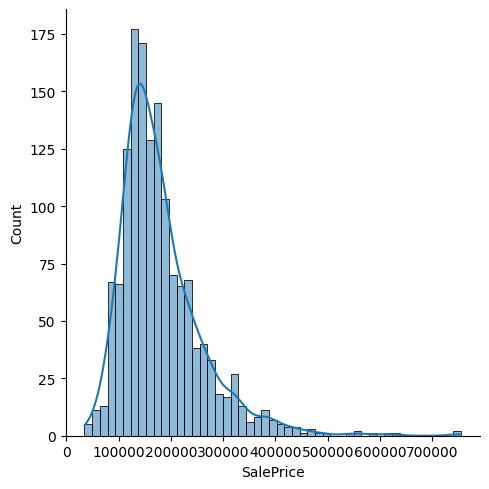

In [ ]:
sns.displot(housing['SalePrice'], kde = True)

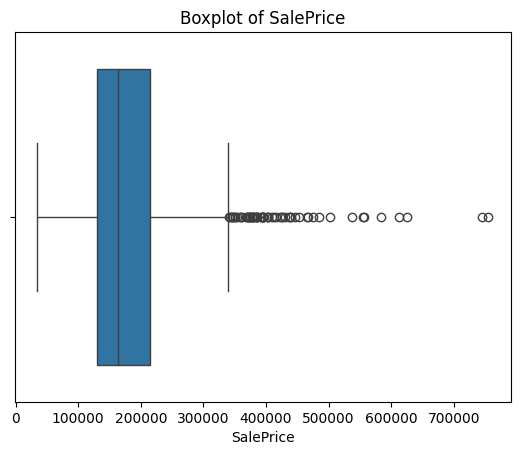

In [ ]:
sns.boxplot(x=housing['SalePrice'])
plt.title('Boxplot of SalePrice')
plt.show()

In [ ]:
def detectar_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return outliers

y_outliers = detectar_outliers(housing, 'SalePrice')
print(len(y_outliers))

61


### Correlación con la variable objetivo

Correlación con SalePrice:
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SaleP

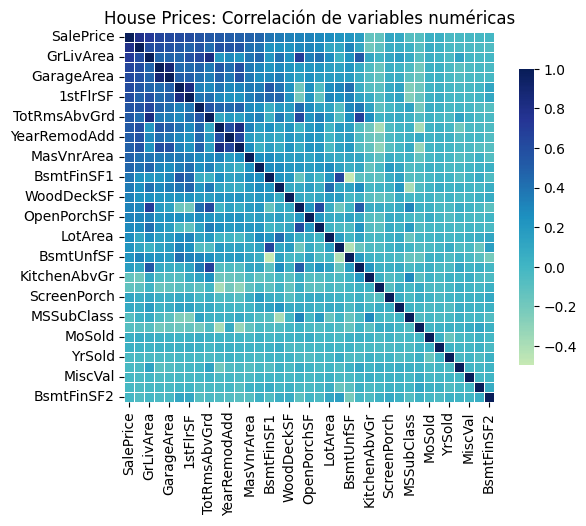

In [ ]:
num = housing.select_dtypes(include = np.number).drop(columns=["Id"])

corr = num.corr()

# Ordenar variables según correlación con SalePrice
order = corr["SalePrice"].abs().sort_values(ascending=False).index
corr_ord = corr.loc[order, order]

print("Correlación con SalePrice:")
print(corr_ord["SalePrice"].sort_values(ascending=False))

plt.title("House Prices: Correlación de variables numéricas")
sns.heatmap(
    corr_ord, annot=False, fmt=".2f",
    cmap="YlGnBu", center=0, square=True, linewidths=.5, cbar_kws={"shrink": .8}
)
plt.show()

Correlación con SalePrice:
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
ExterQual        0.682639
KitchenQual      0.659600
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
BsmtQual         0.585207
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
FireplaceQu      0.520438
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
HeatingQC        0.427649
BsmtFinSF1       0.386420
BsmtExposure     0.374696
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
BsmtFinType1     0.304908
HalfBath         0.284108
GarageQual       0.273839
LotArea          0.263843
GarageCond       0.263191
CentralAir       0.251328
PavedDrive       0.231357
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BsmtCond         0.212607
BedroomAbvGr     0.168213
PoolQC           0.111696
ScreenPorch

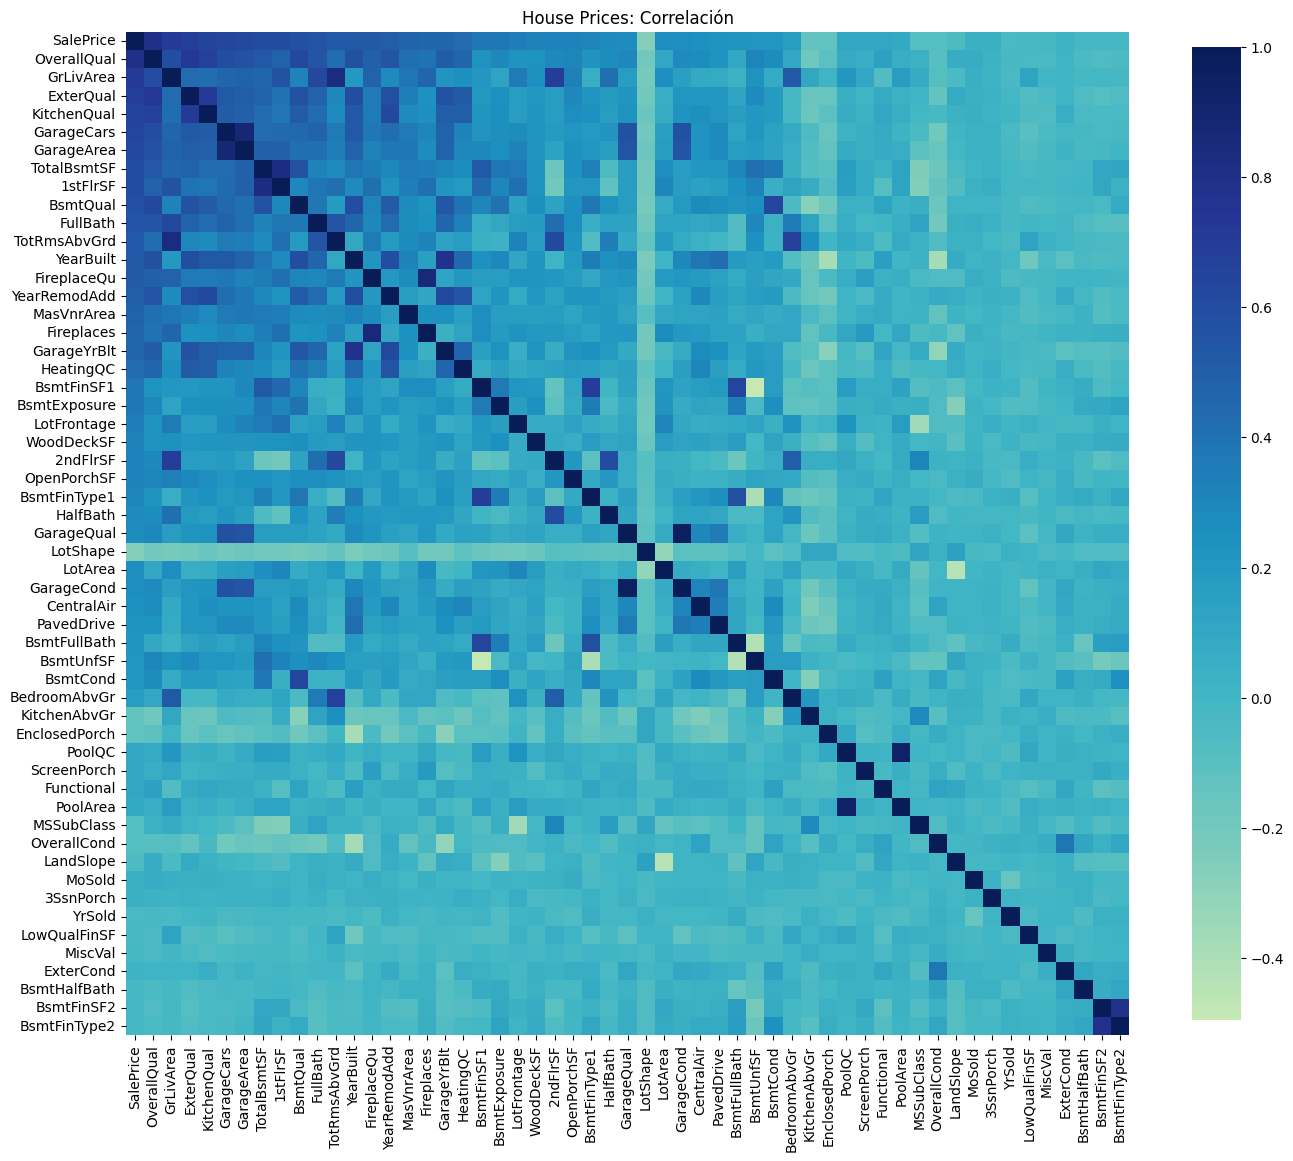

In [ ]:
df = pd.read_csv("/content/kaggledb/train.csv")

ORDINAL_MAP = {
    "ExterQual":  {"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},
    "ExterCond":  {"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},
    "BsmtQual":   {"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},
    "BsmtCond":   {"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},
    "HeatingQC":  {"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},
    "KitchenQual":{"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},
    "FireplaceQu":{"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},
    "GarageQual": {"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},
    "GarageCond": {"None":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5},
    "PoolQC":     {"None":0,"Fa":2,"TA":3,"Gd":4,"Ex":5},
    "BsmtExposure":{"None":0,"No":1,"Mn":2,"Av":3,"Gd":4},
    "BsmtFinType1":{"None":0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6},
    "BsmtFinType2":{"None":0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6},
    "Functional":{"Sal":0,"Sev":1,"Maj2":2,"Maj1":3,"Mod":4,"Min2":5,"Min1":6,"Typ":7},
    "LandSlope":{"Sev":0,"Mod":1,"Gtl":2},
    "LotShape":{"IR3":0,"IR2":1,"IR1":2,"Reg":3},
    "PavedDrive":{"N":0,"P":1,"Y":2},
    "CentralAir":{"N":0,"Y":1}
}

for col, mp in ORDINAL_MAP.items():
    if col in df.columns:
        df[col] = df[col].fillna("None").map(mp).astype("float")

force_numeric = ["MSSubClass","LotFrontage"]
for col in force_numeric:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

num = df.select_dtypes(include=[np.number]).drop(columns=["Id"], errors="ignore")
num = num.fillna(num.median(numeric_only=True))

corr = num.corr()

# Ordenar variables según correlación con SalePrice
order = corr["SalePrice"].abs().sort_values(ascending=False).index
corr_ord = corr.loc[order, order]

print("Correlación con SalePrice:")
print(corr_ord["SalePrice"].sort_values(ascending=False))

plt.figure(figsize=(14,12))
sns.heatmap(corr_ord, cmap="YlGnBu", center=0, square=True, cbar_kws={"shrink": .9})
plt.title("House Prices: Correlación")
plt.tight_layout()
plt.show()



## Generación diccionario de datos del dataset

In [ ]:
def safe_sample_values(series, k=3):
    vals = series.dropna().unique()
    vals = vals[:k] if len(vals) >= k else vals
    # Convierte a strings cortos
    return ", ".join(map(lambda v: str(v)[:18], vals))

def build_dictionary(df):
    d = []
    for col in df.columns:
        s = df[col]
        dtype = "float" if np.issubdtype(s.dtype, np.floating) else ("int" if np.issubdtype(s.dtype, np.integer) else "object")
        miss = s.isna().mean()*100
        nunq = s.nunique(dropna=True)
        samp = safe_sample_values(s, 3)
        d.append([col, dtype, f"{miss:.1f}%", nunq, samp])
    dic = pd.DataFrame(d, columns=["column", "dtype", "%missing", "n_unique", "sample_values"])
    return dic.sort_values(["dtype","column"]).reset_index(drop=True)

In [ ]:
dic = build_dictionary(df)
dic.to_csv("x_data_dictionary.csv", index=False)